In [28]:
library(rstan)
library(loo)

In [29]:
set.seed(123)
y <- rbinom(500, size = 100, prob = 0.01016)
head(y)


[1]  8 13  9 14 15  5

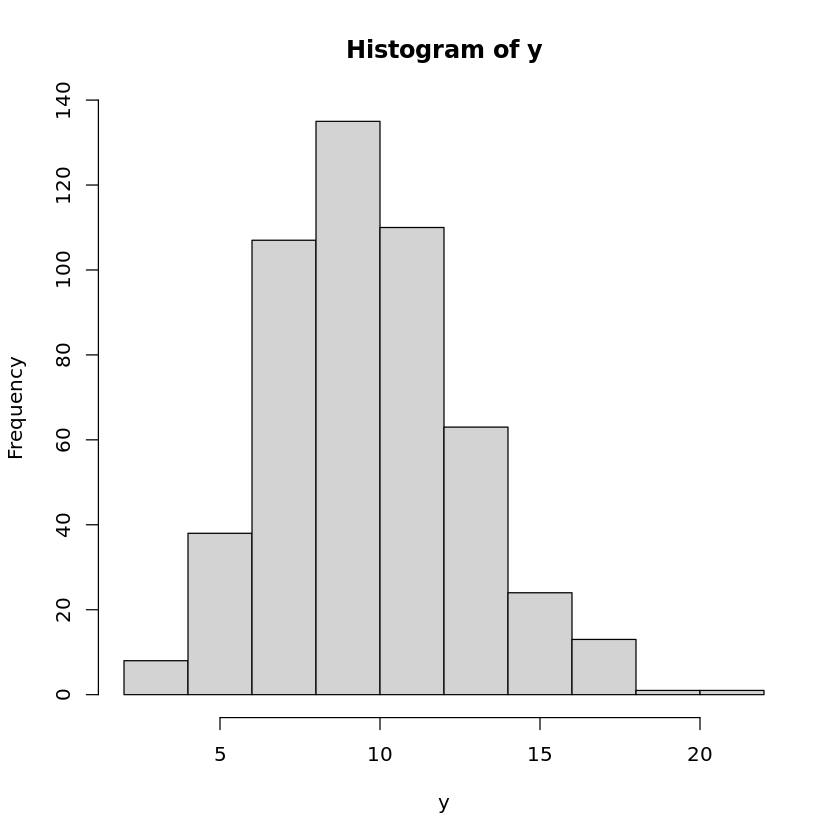

In [30]:
hist(y)

In [31]:
model_string <- "
data {
  int n;
  int y[n];
}
parameters {
  real<lower=0, upper=1> theta;
}
model {
  for (i in 1:n) {
    target += binomial_lpmf(y[i] | 100, theta);
  }
}

generated quantities {
  vector[n] log_lik;
  for (i in 1:n) {
    log_lik[i] = binomial_lpmf(y[i] | 100, theta);
  }
}
"

bermodel <- stan(model_code = model_string, data = list(y = y, n = length(y)) )


SAMPLING FOR MODEL '75be00419c4b686a3dfec72e08400c81' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000386 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 3.86 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.64695 seconds (Warm-up)
Chain 1:                1.68691 seconds (Sampling)
C

In [32]:
model_string <- "
data {
  int n;
  real y[n];
}
parameters {
  real mu;
  real<lower=0> sigma;
}
model {
    y ~ normal(mu, sigma);
}

generated quantities {
  vector[n] log_lik;
  for (i in 1:n) {
    log_lik[i] = normal_lpdf(y[i] | mu, sigma);
  }
}
"

normmodel <- stan(model_code = model_string, data = list(y = y, n = length(y)) )


SAMPLING FOR MODEL 'ccd1152d9baa79f867db11c430aff909' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 9e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.03705 seconds (Warm-up)
Chain 1:                0.034406 seconds (Sampling)
Cha

In [33]:
  log_lik_1 <- extract_log_lik(bermodel, merge_chains = FALSE)
  r_eff <- relative_eff(exp(log_lik_1), cores = 1) 
  loo_1 <- loo(log_lik_1, r_eff = r_eff, cores = 2)
  elpd1 <- loo_1$estimates[1,1]

In [34]:
  log_lik_2 <- extract_log_lik(normmodel, merge_chains = FALSE)
  r_eff <- relative_eff(exp(log_lik_2), cores = 1) 
  loo_2 <- loo(log_lik_2, r_eff = r_eff, cores = 2)
  elpd2 <- loo_2$estimates[1,1]

In [35]:
elpd1

[1] -1249.16

In [36]:
elpd2

[1] -1255.345

In [37]:
get_posterior_mean(bermodel)[1,]

mean-chain:1    mean-chain:2    mean-chain:3    mean-chain:4 mean-all chains 
      0.1016800       0.1016371       0.1014859       0.1015207       0.1015809

In [38]:
get_posterior_mean(normmodel)[1,]

mean-chain:1    mean-chain:2    mean-chain:3    mean-chain:4 mean-all chains 
       10.16034        10.15759        10.15610        10.14676        10.15520

In [39]:
loo_compare(loo_1, loo_2)

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
model1,0.000000,0.000000,-1249.160,15.59028,1.007772,0.06625385,2498.319,31.18056
model2,-6.185123,2.567269,-1255.345,16.46739,2.031161,0.24154635,2510.690,32.93477
